In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!cp /content/drive/MyDrive/tps-aug-2022/tabular-playground-series-aug-2022.zip .
!unzip tabular-playground-series-aug-2022.zip

Archive:  tabular-playground-series-aug-2022.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [1]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import csv

In [4]:
def scale_minmax(val, minval, maxval):
  if np.isnan(val):
    val = (minval + maxval) / 2
  
  if val < minval:
    val = minval
  elif val > maxval:
    val = maxval
  
  return (val - minval) / maxval

def load_dataset(training=True):
  df = pd.read_csv(f'/content/{"train" if training else "test"}.csv')

  if training:
    df = df.iloc[np.random.permutation(len(df))]
    y = df.pop('failure').to_numpy()
  
  df = df.drop('id', axis=1)
  
  df['loading'] = df['loading'].apply(lambda x: scale_minmax(math.log(x), 3.5, 5.956))
  # df['product_code_A'] = df['product_code'].apply(lambda x: int(x == 'A'))
  # df['product_code_B'] = df['product_code'].apply(lambda x: int(x == 'B'))
  # df['product_code_C'] = df['product_code'].apply(lambda x: int(x == 'C'))
  # df['product_code_D'] = df['product_code'].apply(lambda x: int(x == 'D'))
  # df['product_code_E'] = df['product_code'].apply(lambda x: int(x == 'E'))
  # df['attribute_0'] = df['attribute_0'].apply(lambda x: int(x == 'material_5'))
  # df['attribute_1_5'] = df['attribute_1'].apply(lambda x: int(x == 'material_5'))
  # df['attribute_1_6'] = df['attribute_1'].apply(lambda x: int(x == 'material_6'))
  # df['attribute_1_8'] = df['attribute_1'].apply(lambda x: int(x == 'material_8'))
  # df['attribute_2_5'] = df['attribute_2'].apply(lambda x: int(x == 5))
  # df['attribute_2_6'] = df['attribute_2'].apply(lambda x: int(x == 6))
  # df['attribute_2_7'] = df['attribute_2'].apply(lambda x: int(x == 7))
  # df['attribute_2_8'] = df['attribute_2'].apply(lambda x: int(x == 8))
  # df['attribute_2_9'] = df['attribute_2'].apply(lambda x: int(x == 9))
  # df['attribute_3_5'] = df['attribute_3'].apply(lambda x: int(x == 5))
  # df['attribute_3_6'] = df['attribute_3'].apply(lambda x: int(x == 6))
  # df['attribute_3_7'] = df['attribute_3'].apply(lambda x: int(x == 7))
  # df['attribute_3_8'] = df['attribute_3'].apply(lambda x: int(x == 8))
  # df['attribute_3_9'] = df['attribute_3'].apply(lambda x: int(x == 9))
  df['measurement_0'] = df['measurement_0'].apply(lambda x: scale_minmax(x, 0, 30))
  df['measurement_1'] = df['measurement_1'].apply(lambda x: scale_minmax(x, 0, 29))
  df['measurement_2'] = df['measurement_2'].apply(lambda x: scale_minmax(x, 0, 28))
  df['measurement_3'] = df['measurement_3'].apply(lambda x: scale_minmax(x, 13.6, 21.5))
  df['measurement_4'] = df['measurement_4'].apply(lambda x: scale_minmax(x, 7.38, 16.5))
  df['measurement_5'] = df['measurement_5'].apply(lambda x: scale_minmax(x, 12.1, 21.7))
  df['measurement_6'] = df['measurement_6'].apply(lambda x: scale_minmax(x, 12.7, 21.5))
  df['measurement_7'] = df['measurement_7'].apply(lambda x: scale_minmax(x, 7.85, 15.8))
  df['measurement_8'] = df['measurement_8'].apply(lambda x: scale_minmax(x, 14.9, 23.8))
  df['measurement_9'] = df['measurement_9'].apply(lambda x: scale_minmax(x, 7.54, 15.4))
  df['measurement_10'] = df['measurement_10'].apply(lambda x: scale_minmax(x, 9.17, 23.4))
  df['measurement_11'] = df['measurement_11'].apply(lambda x: scale_minmax(x, 12.5, 25.6))
  df['measurement_12'] = df['measurement_12'].apply(lambda x: scale_minmax(x, 5.17, 19.0))
  df['measurement_13'] = df['measurement_13'].apply(lambda x: scale_minmax(x, 9.21, 22.7))
  df['measurement_14'] = df['measurement_14'].apply(lambda x: scale_minmax(x, 8.41, 23.1))
  df['measurement_15'] = df['measurement_15'].apply(lambda x: scale_minmax(x, 8.42, 22.1))
  df['measurement_16'] = df['measurement_16'].apply(lambda x: scale_minmax(x, 9.7, 24.1))
  df['measurement_17'] = df['measurement_17'].apply(lambda x: scale_minmax(x, 197, 1310))

  df = df.drop('product_code', axis=1)
  df = df.drop('attribute_0', axis=1)
  df = df.drop('attribute_1', axis=1)
  df = df.drop('attribute_2', axis=1)
  df = df.drop('attribute_3', axis=1)

  x = df.to_numpy()

  if training:
    return x, y
  else:
    return x

In [5]:
train_x, train_y = load_dataset(training=True)
submission_x = load_dataset(training=False)

In [6]:
train_x, test_x, train_y, test_y = train_test_split(
    train_x, train_y, test_size=0.1, random_state=42
)
train_x, train_y = SMOTE(random_state=42).fit_resample(train_x, train_y)

In [17]:
def compile_model():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(1024, activation='leaky_relu', input_shape=[19]),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(1024, activation='leaky_relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(512, activation='leaky_relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(256, activation='leaky_relu'),
      tf.keras.layers.Dropout(0.1),
      tf.keras.layers.Dense(128, activation='leaky_relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(
      optimizer=tf.keras.optimizers.Adam(lr=1e-4),
      loss='binary_crossentropy',
      metrics=['accuracy']
  )

  return model

In [20]:
# model = compile_model()
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=500,
    restore_best_weights=True,
)

history = model.fit(
    x=train_x,
    y=train_y,
    batch_size=len(train_x),
    validation_data=(test_x, test_y),
    epochs=5000,
)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 161ms/step - loss: 0.2087 - accuracy: 0.9152 - val_loss: 1.0189 - val_accuracy: 0.6436
Epoch 2502/5000
1/1 [==============================] - 0s 164ms/step - loss: 0.2131 - accuracy: 0.9139 - val_loss: 1.0172 - val_accuracy: 0.6428
Epoch 2503/5000
1/1 [==============================] - 0s 165ms/step - loss: 0.2172 - accuracy: 0.9105 - val_loss: 1.0097 - val_accuracy: 0.6492
Epoch 2504/5000
1/1 [==============================] - 0s 165ms/step - loss: 0.2142 - accuracy: 0.9126 - val_loss: 1.0053 - val_accuracy: 0.6511
Epoch 2505/5000
1/1 [==============================] - 0s 157ms/step - loss: 0.2151 - accuracy: 0.9108 - val_loss: 1.0101 - val_accuracy: 0.6507
Epoch 2506/5000
1/1 [==============================] - 0s 171ms/step - loss: 0.2183 - accuracy: 0.9091 - val_loss: 1.0180 - val_accuracy: 0.6451
Epoch 2507/5000
1/1 [==============================] - 0s 171ms/step - loss: 0.2127 - accuracy:

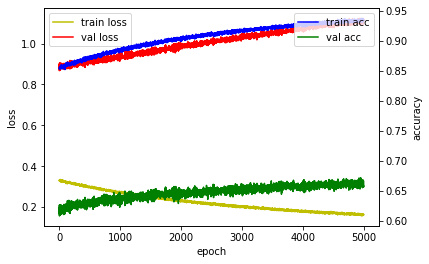

In [21]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper right')

plt.show()

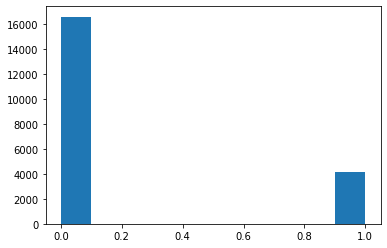

In [22]:
predict_y = model.predict_on_batch(submission_x)
predict_y = predict_y > 0.5
predict_y = 1 * predict_y
predict_y = predict_y.squeeze(axis=-1)

plt.hist(predict_y)
plt.show()

pd.DataFrame({
    'id': list(range(26570, 26570+20775)),
    'failure': predict_y,
}).to_csv('submission.csv', index=False)